First we import all essentiall tools we might need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import seaborn as sns
import math as math
from scipy import stats

We import our Dataset(s) and look at what our data is exactly and whether or not is has missing values etc which we might need to clean for a correct statistical analysis later.

In [2]:
#read in data
df_geo = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--life_expectancy/master/ddf--entities--geo.csv")
df_life_expectancy = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--life_expectancy/master/ddf--datapoints--life_expectancy_at_birth--by--geo--time.csv")
#we iterate over the columns
for i in range(0,df_life_expectancy.shape[1]):
    print("In Category of df_life_expectancy: {} we have {} nan values".format(df_life_expectancy.columns[i],df_life_expectancy.isnull().sum()[i]))
for i in range(0,df_geo.shape[1]):
    print("In Category pf df_geo:  {} we have {} nan values".format(df_geo.columns[i],df_geo.isnull().sum()[i]))


In Category of df_life_expectancy: geo we have 0 nan values
In Category of df_life_expectancy: time we have 0 nan values
In Category of df_life_expectancy: life_expectancy_at_birth we have 0 nan values
In Category pf df_geo:  geo we have 0 nan values
In Category pf df_geo:  name we have 0 nan values


df_geo and df_life_expectancy look good regarding missing valueswe will merge them 

In [3]:
df_1 = df_life_expectancy.merge(df_geo, on = "geo")

In [4]:
df_country_classifications = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--open_numbers--world_development_indicators/master/ddf--entities--geo--country.csv")
df_country_classifications.describe

<bound method NDFrame.describe of        country g77_and_oecd_countries income_3groups        income_groups  \
0         abkh                 others            NaN                  NaN   
1          abw                 others    high_income          high_income   
2          afg                    g77     low_income           low_income   
3          ago                    g77  middle_income  lower_middle_income   
4          aia                 others            NaN                  NaN   
..         ...                    ...            ...                  ...   
268  yem_south                 others            NaN                  NaN   
269        yug                 others            NaN                  NaN   
270        zaf                    g77  middle_income  upper_middle_income   
271        zmb                    g77  middle_income  lower_middle_income   
272        zwe                    g77  middle_income  lower_middle_income   

     is--country iso3166_1_alpha2 iso3166

We see that in our Dataset here, we have a lot of Missing values furthermore iso3166_2 looks like it's mostly nan.

In [5]:
print("Only {} Value is not nan in this dataset of the iso3166_2  column".format(len(df_country_classifications["iso3166_2"])-df_country_classifications["iso3166_2"].isnull().sum()))
print(df_country_classifications[df_country_classifications["iso3166_2"]==True])

Only 1 Value is not nan in this dataset of the iso3166_2  column
Empty DataFrame
Columns: [country, g77_and_oecd_countries, income_3groups, income_groups, is--country, iso3166_1_alpha2, iso3166_1_alpha3, iso3166_1_numeric, iso3166_2, landlocked, latitude, longitude, main_religion_2008, name, un_sdg_ldc, un_sdg_region, un_state, unhcr_region, unicef_region, unicode_region_subtag, west_and_rest, world_4region, world_6region]
Index: []

[0 rows x 23 columns]


Now we left joint df_country_classifications to df_1 because we want to preserve the time column

In [6]:
df = df_1.merge(df_country_classifications, on = "name", how="left")


In [7]:
df_group =pd.read_csv("https://geografieliberec.cz/data/official/data_02/data-un_dynamics/WPP2019_PopulationByAgeSex_Medium.csv")

we don't need df_group for Task 1 but we will need it for Task 2


In [8]:
#deleting all unnnessearcy columns
df =df.drop(columns = ["iso3166_1_alpha2",'g77_and_oecd_countries','unhcr_region', 'unicef_region', 'unicode_region_subtag',
                  'west_and_rest', 'world_4region', 'world_6region','iso3166_1_alpha2', 'iso3166_1_alpha3',
       'iso3166_1_numeric', 'iso3166_2'])
df

,geo,time,life_expectancy_at_birth,name,country,income_3groups,income_groups,is--country,landlocked,latitude,longitude,main_religion_2008,un_sdg_ldc,un_sdg_region,un_state
0,afg,1800,28.21,Afghanistan,afg,low_income,low_income,True,landlocked,33.0,66.00,muslim,un_least_developed,un_central_and_southern_asia,True
1,afg,1801,28.20,Afghanistan,afg,low_income,low_income,True,landlocked,33.0,66.00,muslim,un_least_developed,un_central_and_southern_asia,True
2,afg,1802,28.19,Afghanistan,afg,low_income,low_income,True,landlocked,33.0,66.00,muslim,un_least_developed,un_central_and_southern_asia,True
3,afg,1803,28.18,Afghanistan,afg,low_income,low_income,True,landlocked,33.0,66.00,muslim,un_least_developed,un_central_and_southern_asia,True
4,afg,1804,28.17,Afghanistan,afg,low_income,low_income,True,landlocked,33.0,66.00,muslim,un_least_developed,un_central_and_southern_asia,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56611,zwe,2096,73.91,Zimbabwe,zwe,middle_income,lower_middle_income,True,landlocked,-19.0,29.75,christian,un_not_least_developed,un_sub_saharan_africa,True
56612,zwe,2097,74.04,Zimbabwe,zwe,middle_income,lower_middle_income,True,landlocked,-19.0,29.75,christian,un_not_least_developed,un_sub_saharan_africa,True
56613,zwe,2098,74.17,Zimbabwe,zwe,middle_income,lower_middle_income,True,landlocked,-19.0,29.75,christian,un_not_least_developed,un_sub_saharan_africa,True
56614,zwe,2099,74.30,Zimbabwe,zwe,middle_income,lower_middle_income,True,landlocked,-19.0,29.75,christian,un_not_least_developed,un_sub_saharan_africa,True


In [9]:
df.columns

Index(['geo', 'time', 'life_expectancy_at_birth', 'name', 'country',
       'income_3groups', 'income_groups', 'is--country', 'landlocked',
       'latitude', 'longitude', 'main_religion_2008', 'un_sdg_ldc',
       'un_sdg_region', 'un_state'],
      dtype='object')

Task 1

In [10]:
#getting right df for the plot
df = df.dropna(subset="un_sdg_region")
df_real = df[(df["time"]>=1900) & (df["time"] <= 2020)]

Text(0.5, 1.0, 'Visualization of the Mean Life-Expectancy over the years of the 8 Major Regions')

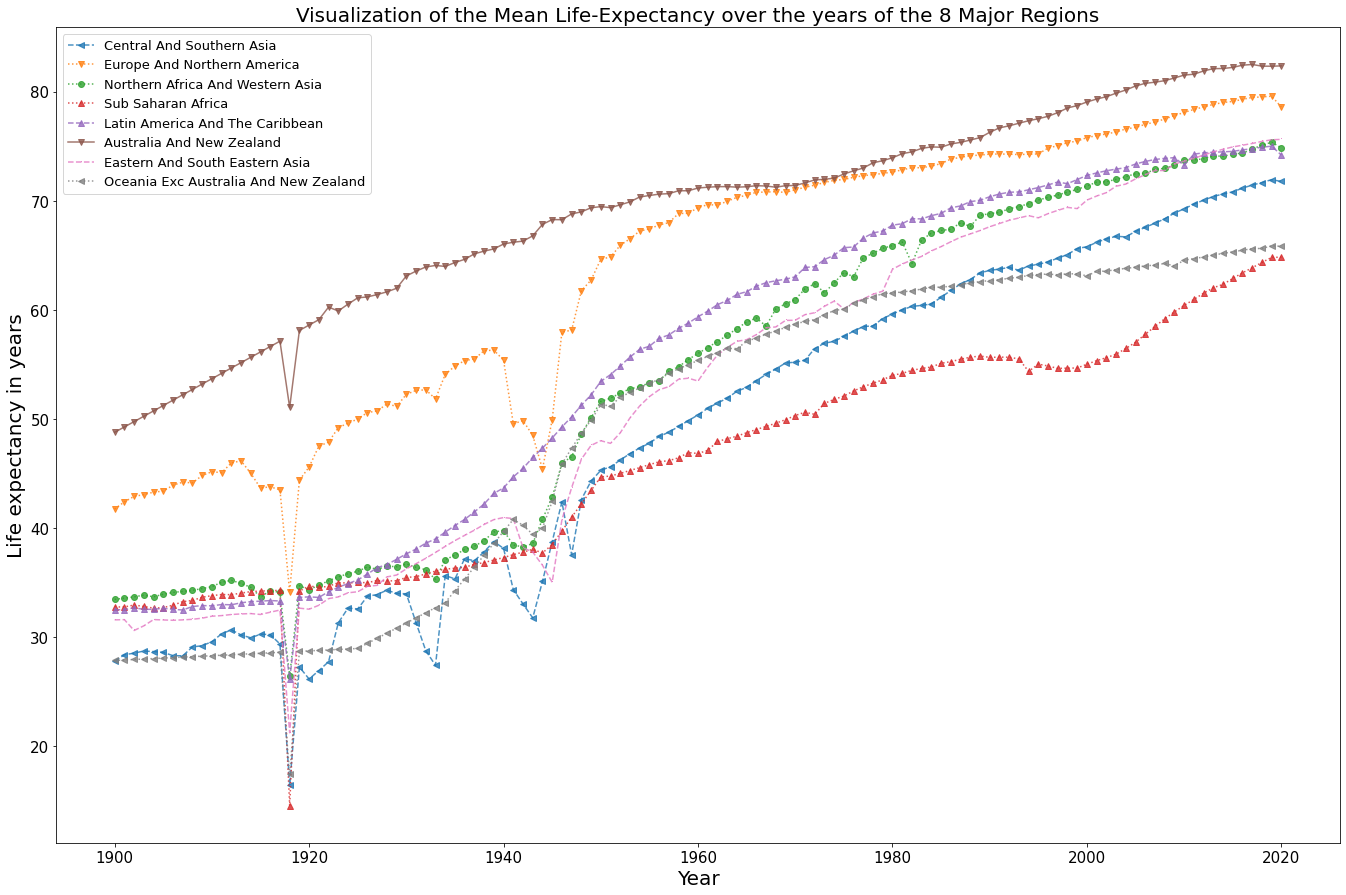

In [11]:
#getting various linestyles and markers but without the ones that would cause trouble
lines_array = list(matplotlib.lines.lineStyles.keys())
marker_array = [".",",","o","v","^","<",">"]
lines_array.remove("None")
lines_array.remove("")
lines_array.remove(" ")
#setting the seed for reproducibility
random.seed(2020)
#Getting the 8 regions
regions = df_real["un_sdg_region"].unique()


plt.figure(figsize=(23,15))

for region in regions:
    plt.plot(df_real[df_real["un_sdg_region"]==region].groupby("time").mean()["life_expectancy_at_birth"].index,
             df_real[df_real["un_sdg_region"]==region].groupby("time").mean()["life_expectancy_at_birth"].values,
             label = "{}".format(region.replace("un_","")).replace("_"," ").title(),alpha = 0.8,linestyle = random.choice(lines_array),marker = random.choice(marker_array))

plt.legend(fontsize=13)
plt.ylabel("Life expectancy in years",fontsize = 20)
plt.xlabel("Year",fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize = 15)
plt.title("Visualization of the Mean Life-Expectancy over the years of the 8 Major Regions",fontsize = 20)


Picking a region: Latin America and the Caribbean

In [12]:
df_latin = df_real[df_real["un_sdg_region"]=="un_latin_america_and_the_caribbean"]

#getting list of countries
countries = df_latin["name"].unique()

print(len(countries))
print(countries)


33
['Antigua and Barbuda' 'Argentina' 'Bahamas' 'Barbados' 'Belize' 'Bolivia'
 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba' 'Dominica'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Grenada' 'Guatemala'
 'Guyana' 'Haiti' 'Honduras' 'Jamaica' 'Mexico' 'Nicaragua' 'Panama'
 'Paraguay' 'Peru' 'St. Kitts and Nevis' 'St. Lucia'
 'St. Vincent and the Grenadines' 'Suriname' 'Trinidad and Tobago'
 'Uruguay' 'Venezuela']


We see that we have 33 countries, putting everything in 1 plot will be to messy --> create 6 plots for better overview

In [13]:
plt.style.use("seaborn")

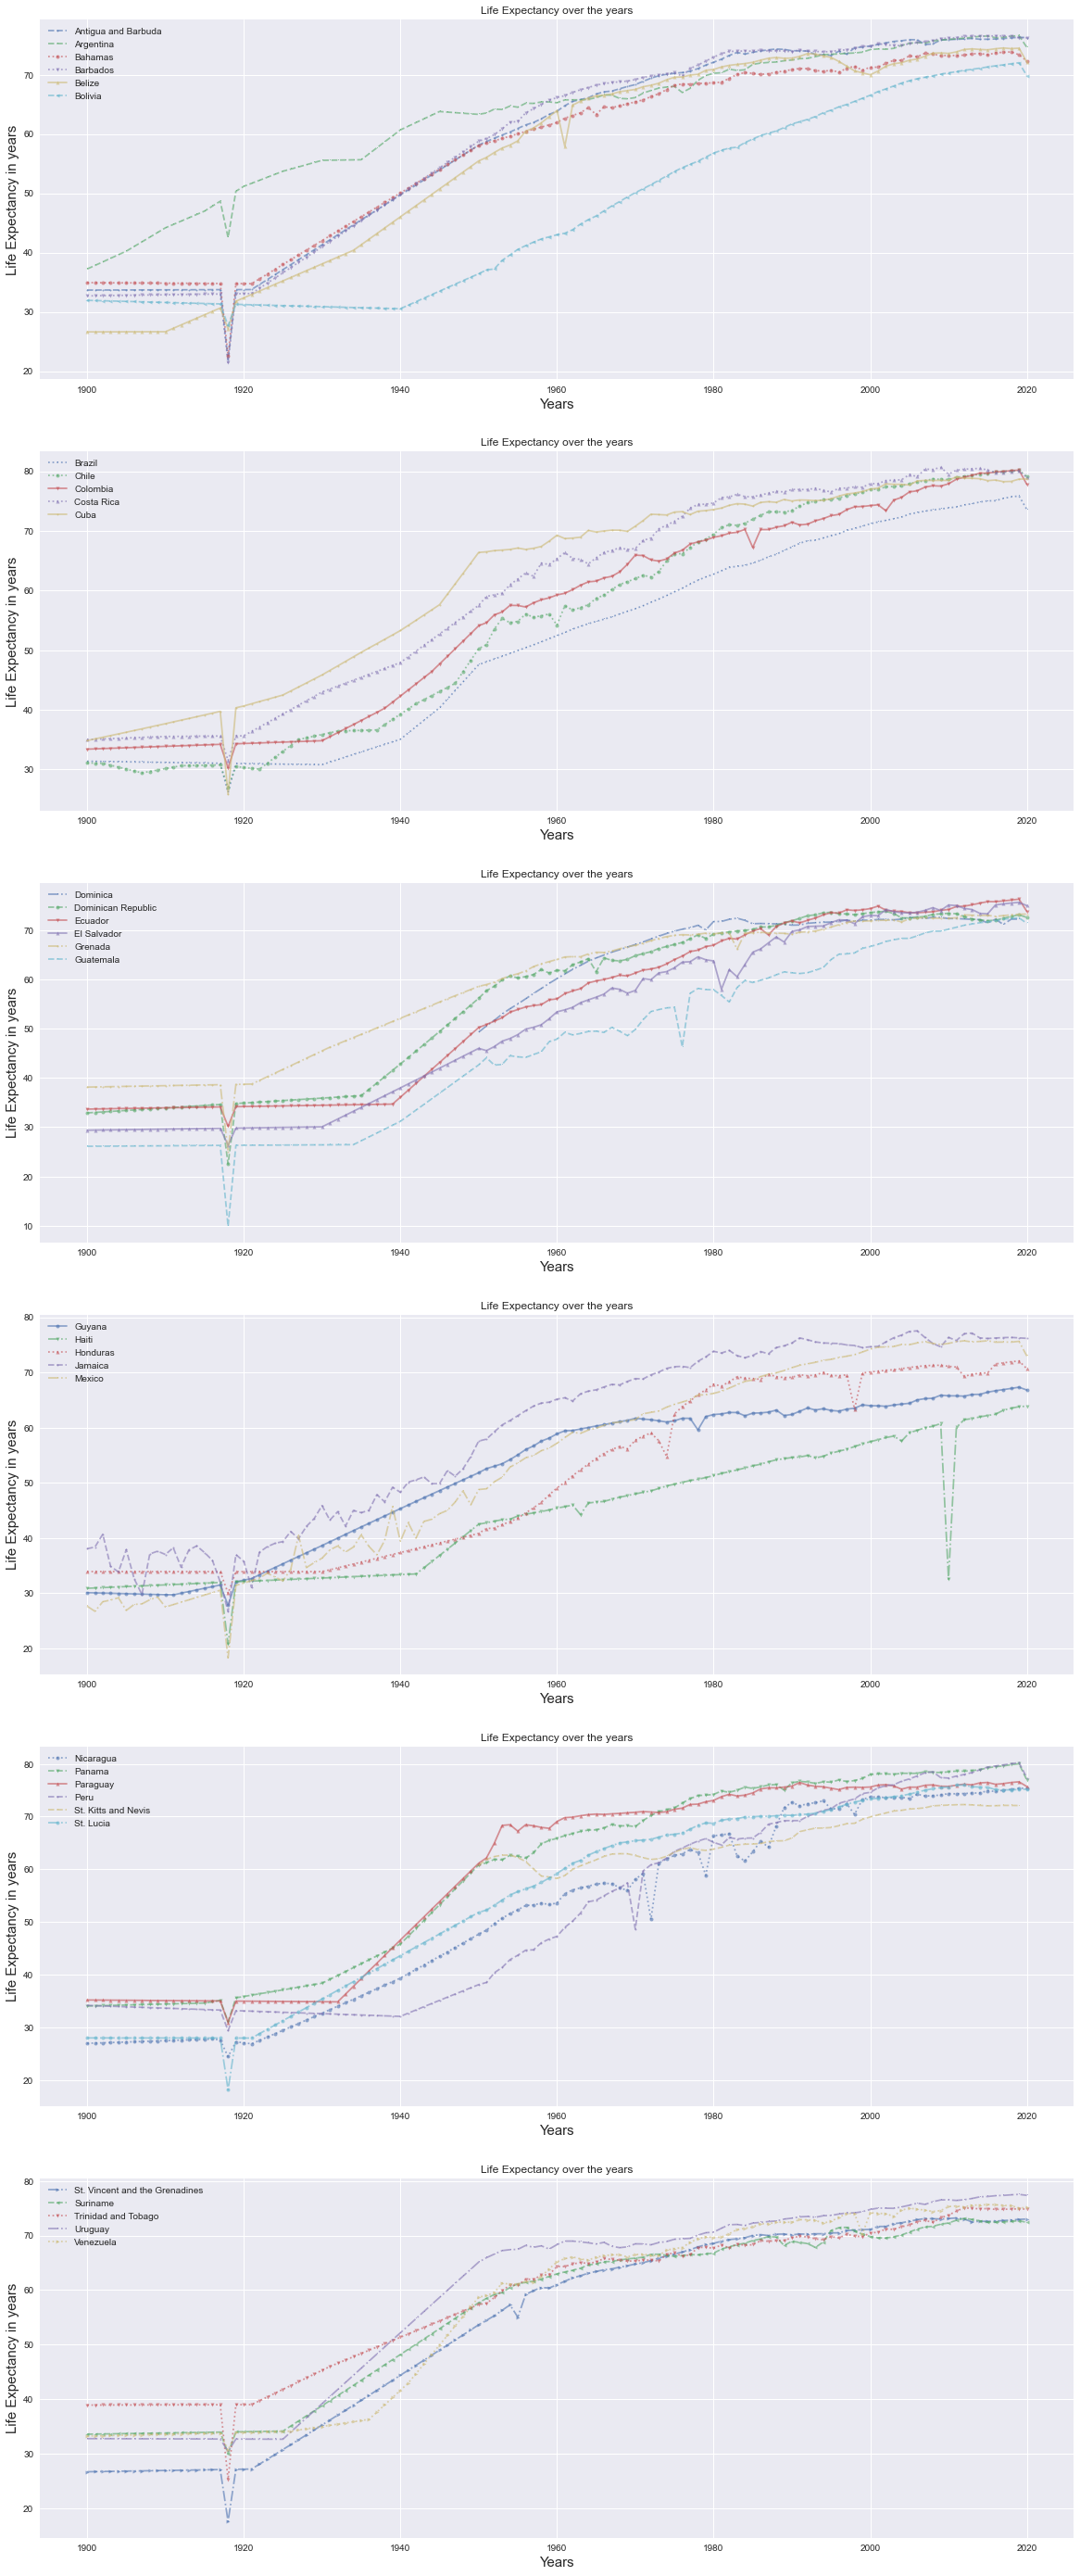

In [14]:
plot_amount=5
fig,ax = plt.subplots(6,figsize = (20,50))
plt.style.use("seaborn")
lines_array = list(matplotlib.lines.lineStyles.keys())
marker_array = [".",",","o","v","^","<",">"]
lines_array.remove("None")
lines_array.remove("")
lines_array.remove(" ")

for i,country in enumerate(countries):
    if i <=5:
        ax[0].plot(df_latin[df_latin["name"]==country]["time"],
                  df_latin[df_latin["name"]==country]["life_expectancy_at_birth"],
                  label=country,linestyle= random.choice(lines_array),marker = marker_array[i],alpha = 0.6,markersize = 4)
        ax[0].set_xlabel("Years",fontsize = 15)
        ax[0].set_ylabel("Life Expectancy in years",fontsize = 15)
        ax[0].set_title("Life Expectancy over the years")
        ax[0].legend()

    if i >= 6 and i <=10:
        ax[1].plot(df_latin[df_latin["name"]==country]["time"],
                  df_latin[df_latin["name"]==country]["life_expectancy_at_birth"],
                  label=country,linestyle= random.choice(lines_array),marker = marker_array[i%5],alpha = 0.6,markersize = 4)
        ax[1].set_xlabel("Years",fontsize = 15)
        ax[1].set_ylabel("Life Expectancy in years",fontsize = 15)
        ax[1].set_title("Life Expectancy over the years")
        ax[1].legend()

    if i >=11 and i <= 16:
        ax[2].plot(df_latin[df_latin["name"]==country]["time"],
                  df_latin[df_latin["name"]==country]["life_expectancy_at_birth"],
                  label=country,linestyle= random.choice(lines_array),marker =marker_array[i%5],alpha = 0.6,markersize = 4)
        ax[2].set_xlabel("Years",fontsize = 15)
        ax[2].set_ylabel("Life Expectancy in years",fontsize = 15)
        ax[2].set_title("Life Expectancy over the years")
        ax[2].legend()

    if i >=17 and i <=21:
        ax[3].plot(df_latin[df_latin["name"]==country]["time"],
                  df_latin[df_latin["name"]==country]["life_expectancy_at_birth"],
                  label=country,linestyle= random.choice(lines_array),marker = marker_array[i%5],alpha = 0.6,markersize = 4)
        ax[3].set_xlabel("Years",fontsize = 15)
        ax[3].set_ylabel("Life Expectancy in years",fontsize = 15)
        ax[3].set_title("Life Expectancy over the years")
        ax[3].legend()


    if i >=22 and i <= 27:
        ax[4].plot(df_latin[df_latin["name"]==country]["time"],
                  df_latin[df_latin["name"]==country]["life_expectancy_at_birth"],
                  label=country,linestyle= random.choice(lines_array),marker = marker_array[i%5],alpha = 0.6,markersize = 4)
        ax[4].set_xlabel("Years",fontsize = 15)
        ax[4].set_ylabel("Life Expectancy in years",fontsize = 15)
        ax[4].set_title("Life Expectancy over the years")
        ax[4].legend()

    if i >=28 and i <33:
        ax[5].plot(df_latin[df_latin["name"]==country]["time"],
                  df_latin[df_latin["name"]==country]["life_expectancy_at_birth"],
                  label=country,linestyle= random.choice(lines_array),marker = random.choice(marker_array),alpha = 0.6,markersize = 4)
        ax[5].set_xlabel("Years",fontsize = 15)
        ax[5].set_ylabel("Life Expectancy in years",fontsize = 15)
        ax[5].set_title("Life Expectancy over the years")
        ax[5].legend()


    

we can see the sharpe decrease of life expectancy in Haiti due to natural disaster

Plot of the 5 countries with highest and lowest mean life expectancy in 2000-2020

Text(0.5, 1.0, 'Comparions between Top-5 (red) and Bottom-5 (blue) countries regarding their Life Expectancy')

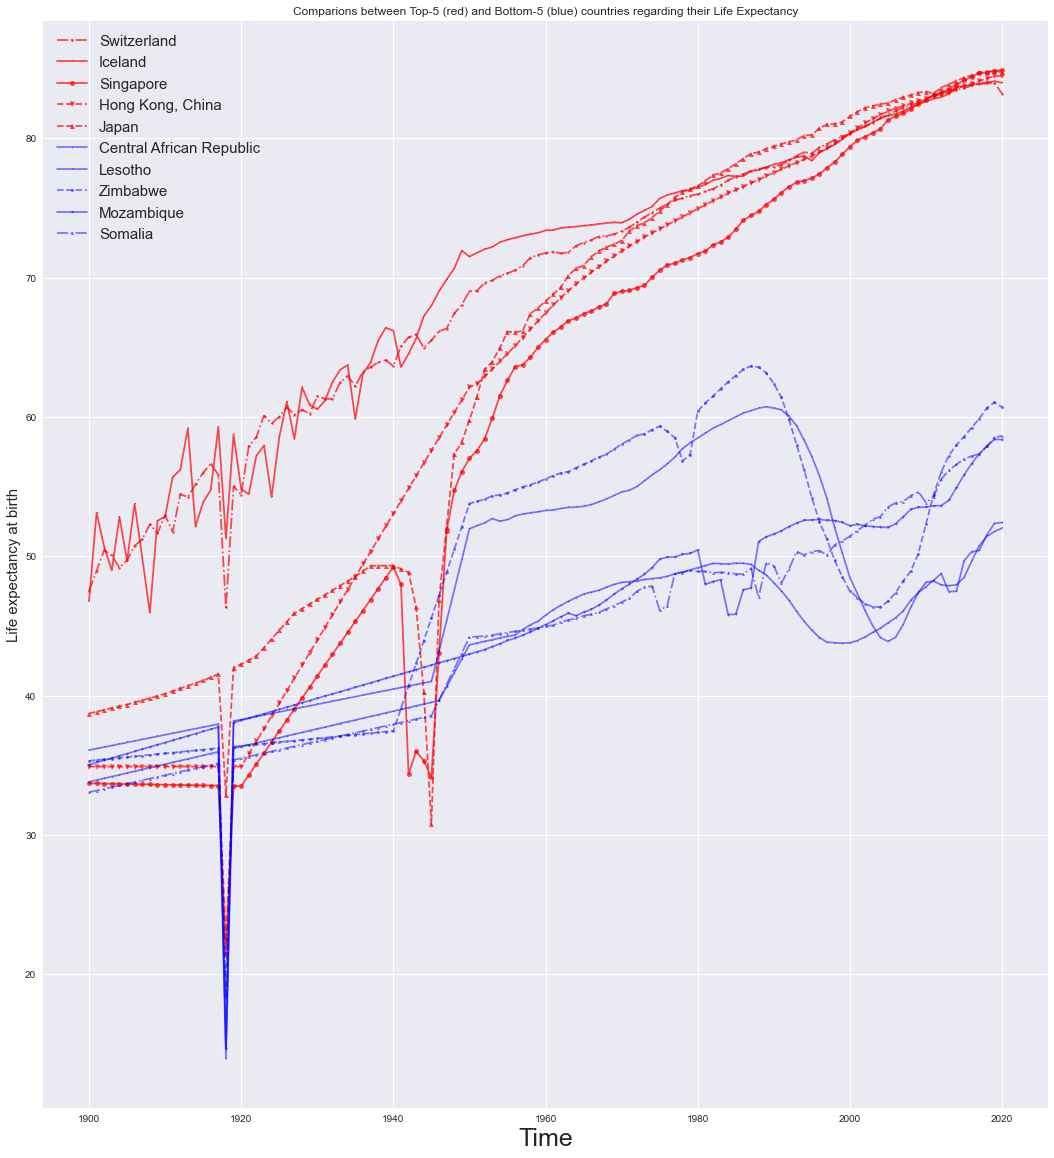

In [15]:
df_decade = df_real[df_real["time"]>=2000]


#we get out top 5 countries with life_expectancy_at_birth trick here is to take the sum instead of the mean since we already know the no of years
low_five =df_decade.groupby(["name"]).sum().sort_values(by="life_expectancy_at_birth")[:5].index
#we get out top 10 countries with highest life_expectancy_at_birth
high_ten=df_decade.groupby(["name"]).sum().sort_values(by="life_expectancy_at_birth")[-5:].index

plt.figure(figsize=(18,20))
for i in range(0,len(high_ten)):
    plt.plot(df_real[df_real["name"]==high_ten[i]]["time"],
             df_real[df_real["name"]==high_ten[i]]["life_expectancy_at_birth"],
            color= "red",label= high_ten[i],linestyle= random.choice(lines_array),marker = marker_array[i],markersize = 5,alpha = 0.7)
for i in range(0,len(high_ten)):
    plt.plot(df_real[df_real["name"]==low_five[i]]["time"],
             df_real[df_real["name"]==low_five[i]]["life_expectancy_at_birth"],label =low_five[i],
            color = "blue",linestyle= random.choice(lines_array),marker = marker_array[i],markersize = 3,alpha = 0.5)
plt.legend(fontsize = 15)

plt.xlabel("Time",fontsize=25)
plt.ylabel("Life expectancy at birth",fontsize = 15)
plt.title("Comparions between Top-5 (red) and Bottom-5 (blue) countries regarding their Life Expectancy")


Which Factors contribute to life-expectancy between 2000-2020?

First we look at what kind of factors we have. Here we have a lot of binary factors: eg landlocked vs coastline, northern vs southern hemisphere etc. we also have a continous variable: Longitude.

In [16]:
#we use df_decade
df_decade

,geo,time,life_expectancy_at_birth,name,country,income_3groups,income_groups,is--country,landlocked,latitude,longitude,main_religion_2008,un_sdg_ldc,un_sdg_region,un_state
200,afg,2000,54.73,Afghanistan,afg,low_income,low_income,True,landlocked,33.0,66.00,muslim,un_least_developed,un_central_and_southern_asia,True
201,afg,2001,54.83,Afghanistan,afg,low_income,low_income,True,landlocked,33.0,66.00,muslim,un_least_developed,un_central_and_southern_asia,True
202,afg,2002,55.54,Afghanistan,afg,low_income,low_income,True,landlocked,33.0,66.00,muslim,un_least_developed,un_central_and_southern_asia,True
203,afg,2003,56.50,Afghanistan,afg,low_income,low_income,True,landlocked,33.0,66.00,muslim,un_least_developed,un_central_and_southern_asia,True
204,afg,2004,57.14,Afghanistan,afg,low_income,low_income,True,landlocked,33.0,66.00,muslim,un_least_developed,un_central_and_southern_asia,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,zwe,2016,59.23,Zimbabwe,zwe,middle_income,lower_middle_income,True,landlocked,-19.0,29.75,christian,un_not_least_developed,un_sub_saharan_africa,True
56532,zwe,2017,59.87,Zimbabwe,zwe,middle_income,lower_middle_income,True,landlocked,-19.0,29.75,christian,un_not_least_developed,un_sub_saharan_africa,True
56533,zwe,2018,60.64,Zimbabwe,zwe,middle_income,lower_middle_income,True,landlocked,-19.0,29.75,christian,un_not_least_developed,un_sub_saharan_africa,True
56534,zwe,2019,61.04,Zimbabwe,zwe,middle_income,lower_middle_income,True,landlocked,-19.0,29.75,christian,un_not_least_developed,un_sub_saharan_africa,True


In [17]:
#getting an overview of our columns
df_decade.columns

Index(['geo', 'time', 'life_expectancy_at_birth', 'name', 'country',
       'income_3groups', 'income_groups', 'is--country', 'landlocked',
       'latitude', 'longitude', 'main_religion_2008', 'un_sdg_ldc',
       'un_sdg_region', 'un_state'],
      dtype='object')

In [18]:
for column in df_decade.columns:
    print(df_decade[column].value_counts())
    print("\nAmount of Missing values in this column =",df_decade[column].isnull().sum(),"\n")

afg    21
pan    21
nzl    21
nic    21
ner    21
       ..
tuv    20
mco    20
kna    20
plw    20
smr    20
Name: geo, Length: 193, dtype: int64

Amount of Missing values in this column = 0 

2000    193
2011    193
2019    193
2018    193
2017    193
2016    193
2015    193
2014    193
2013    193
2012    193
2010    193
2001    193
2009    193
2008    193
2007    193
2006    193
2005    193
2004    193
2003    193
2002    193
2020    184
Name: time, dtype: int64

Amount of Missing values in this column = 0 

76.48    9
74.33    7
73.88    7
73.60    7
80.92    7
        ..
61.62    1
32.52    1
57.54    1
57.79    1
60.69    1
Name: life_expectancy_at_birth, Length: 2222, dtype: int64

Amount of Missing values in this column = 0 

Afghanistan            21
Panama                 21
New Zealand            21
Nicaragua              21
Niger                  21
                       ..
Tuvalu                 20
Monaco                 20
St. Kitts and Nevis    20
Palau                

In [19]:
#get all the columns to adjust data
df_decade.columns
df_adjusted = df_decade.copy()
df_adjusted.reset_index()

df_adjusted["landlocked"] = np.where(df_adjusted["landlocked"]=='landlocked',1,0)
df_adjusted["north hemissphere"]= np.where(df_adjusted["latitude"] >=0,1,0)
df_adjusted["christian"] = np.where(df_adjusted["main_religion_2008"]=='christian',1,0)
df_adjusted["high incomegroup"] = np.where((df_adjusted["income_groups"] == "low_income") | (df_adjusted["income_groups"] == "lower_middle_income"),0,1)
df_adjusted["un_state"] = np.where(df_adjusted["un_state"] == True ,1,0)
low = 1
hihg = 0
#rename columns to make a prettier heatmap
df_adjusted.rename(columns ={"life_expectancy_at_birth":"life expectancy at birth",
              "un_state":"un state"},inplace = True)

Naively we can create a correlation matrix to see where or not something is strongly related to life-expectany

Text(0.5, 1.0, 'Heatmap that shows correlation between different factors')

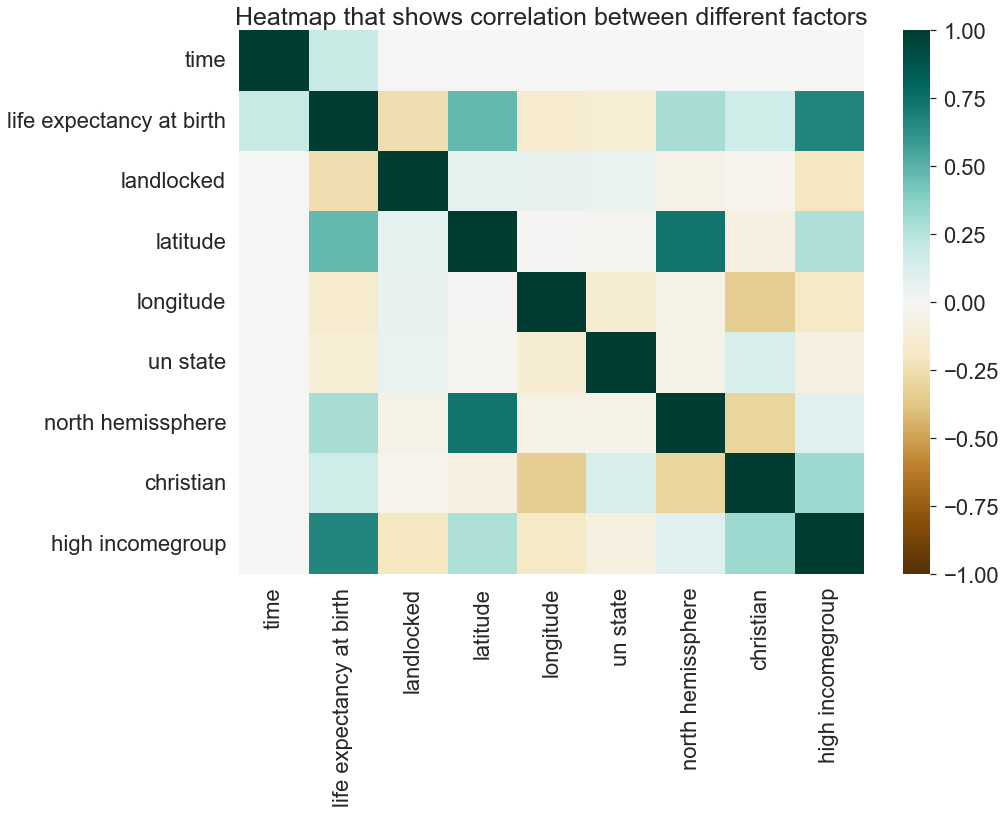

In [20]:
plt.figure(figsize = (14,10))
sns.set(font_scale = 2)
s = sns.heatmap(df_adjusted.corr(), vmin=-1, vmax=1, cmap='BrBG')
plt.title("Heatmap that shows correlation between different factors",fontsize = 25)


We see that the Life Expectancy correlates negatively whith poor people or positively in the high income group. Also the correlation is positive over time and latitude for . This has to be taken with a grain of salt because we use mostly binary values. Note that latitude correlates with hemisspehere. In a bigger model we would use only one feature of these two.

To compare the means between two populations we can use a either a z-test or t-test but with the bigger sample size we go for a z-test. When we assume Normality

we work with significance treshhold of 5 %. 
H0: means of life-expectancy don't differ between groups split by binary factor on significance treshhold
H1: means of life-expectancy differ between groups split by binary factor on significance treshhold


In [21]:
import math as math
from scipy import stats
from statsmodels.stats.weightstats import ztest
import seaborn as sns
from scipy.stats import kstest

In [22]:
kstest(df_adjusted.groupby("name").sum()["life expectancy at birth"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

Text(0.5, 1.0, "Visualization wheter or not it's parametric")

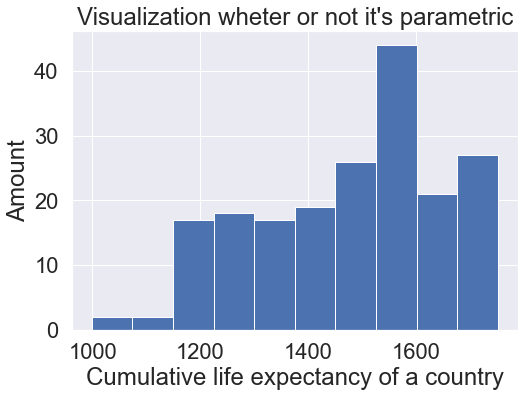

In [23]:
plt.hist(df_adjusted.groupby("name").sum()["life expectancy at birth"])
plt.xlabel("Cumulative life expectancy of a country")
plt.ylabel("Amount")
plt.title("Visualization wheter or not it's parametric")


Seems like our data set doesn't follow a normal distribution! But Nevertheless we calculate the z-test and assume a normal distribution and compare the results 
with an anova to see whether or not it makes a big difference. In Theory we would only need a linear regression or an anova.

In [25]:

binary_factors = ["landlocked","north hemissphere","christian","high incomegroup","un state"]
#check how many group members we have
for column in binary_factors:
    mask = df_adjusted[column] == 1
    df_1 = df_adjusted[mask]["life expectancy at birth"]
    df_0 = df_adjusted[~mask]["life expectancy at birth"]
    mean = df_1.mean() - df_0.mean()
    print(column,len(df_1), len(df_0), round(mean))

landlocked 838 3206 -5
north hemissphere 3227 817 6
christian 2448 1596 3
high incomegroup 2427 1617 12
un state 4002 42 -11


In [26]:
for column in binary_factors:
    mask = df_adjusted[column] == 1
    df_1 = df_adjusted[mask]["life expectancy at birth"].dropna()
    df_0 = df_adjusted[~mask]["life expectancy at birth"].dropna()
    stats, pvalue = ztest(df_1, df_0, alternative='two-sided')
    if pvalue <0.05:
        print("The P-value of the Factor {} is smaller than 0.05 and therefore we can reject H0\np_value: {:.2e}".format(column,pvalue))


The P-value of the Factor landlocked is smaller than 0.05 and therefore we can reject H0
p_value: 1.47e-62
The P-value of the Factor north hemissphere is smaller than 0.05 and therefore we can reject H0
p_value: 2.42e-79
The P-value of the Factor christian is smaller than 0.05 and therefore we can reject H0
p_value: 8.86e-27
The P-value of the Factor high incomegroup is smaller than 0.05 and therefore we can reject H0
p_value: 0.00e+00
The P-value of the Factor un state is smaller than 0.05 and therefore we can reject H0
p_value: 3.94e-16


All factors play a significant role!

Now we look at latitude wheter or not this plays a role

Text(0, 0.5, 'Life expectancy in years')

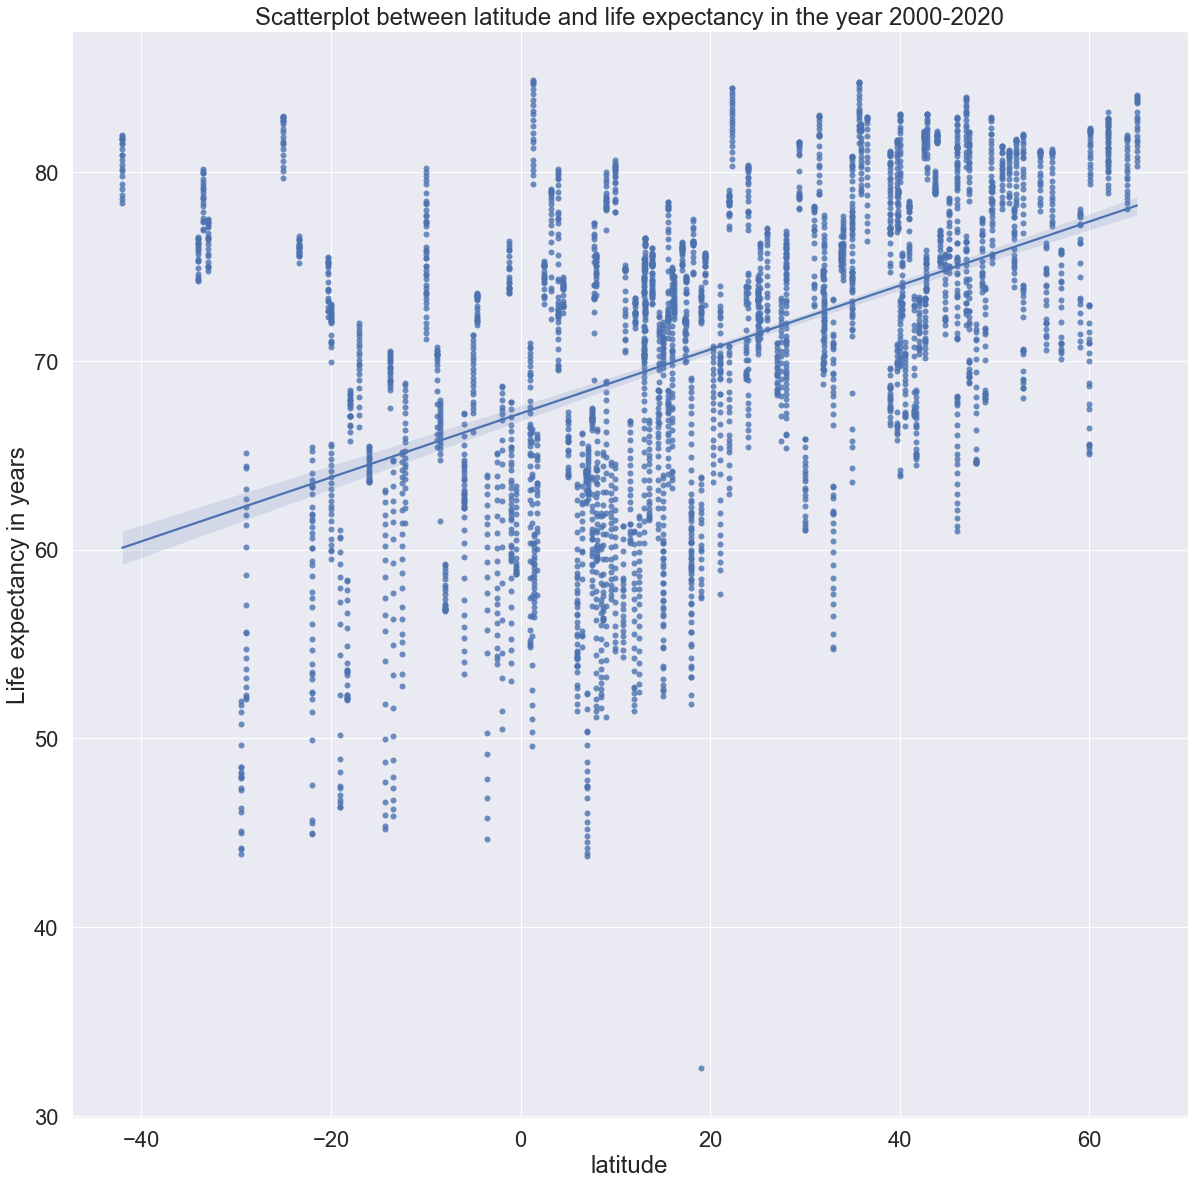

In [27]:
plt.figure(figsize=(20,20))
sns.regplot(x=df_adjusted["latitude"],y = df_adjusted["life expectancy at birth"])
plt.title("Scatterplot between latitude and life expectancy in the year 2000-2020")
plt.ylabel("Life expectancy in years")

looks like with increasing latitude life expectancy increases however there are outliers in the form of probably australia. we can make a linear regression model

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
def standardize(x):
    return (x-np.mean(x))/np.std(x)
df_adjusted["lat"] = standardize(df_adjusted["latitude"].dropna())
df_adjusted["life_st"] = standardize(df_adjusted["life expectancy at birth"].dropna())

mod = smf.ols(formula='life_st ~ lat', data=df_adjusted)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                life_st   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     1160.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.10e-223
Time:                        19:34:44   Log-Likelihood:                -5228.2
No. Observations:                4044   AIC:                         1.046e+04
Df Residuals:                    4042   BIC:                         1.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.143e-15      0.014   8.24e-14      1.000      -0.027       0.027
lat            0.4722      0.014     34.053      0.000       0.445       0.499
==============================================================================
Omnibus:                       43.808   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.640
Skew:                          -0.239   Prob(JB):                     1.23e-10
Kurtosis:                       3.205   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we see that our, model says that longitude plays a role on life expectancy standardize doesnt make much difference it's just to maximize the slope here. both models have a very low r-squared aswell because it's not the only variable which describes life expectancy

We can now even fit a bigger model to findout wheter or not they are also contributing to our linear regression model. 

In [29]:
df_adjusted["hemi"] = df_adjusted["north hemissphere"]
df_adjusted["inc"] = df_adjusted["high incomegroup"]
df_adjusted["un"] = df_adjusted["un state"]
mod = smf.ols(formula='life_st ~ lat + C(landlocked) +C(hemi)+C(christian)+C(inc)+C(un)', data=df_adjusted)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                life_st   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     909.3
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:34:45   Log-Likelihood:                -4009.3
No. Observations:                4044   AIC:                             8033.
Df Residuals:                    4037   BIC:                             8077.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2148      0.111      1.932      0.053      -0.003       0.433
C(landlocked)[T.1]    -0.4172      0.027    -15.583      0.000      -0.470      -0.365
C(hemi)[T.1]          -0.1193      0.041     -2.928      0.003      -0.199      -0.039
C(christian)[T.1]      0.0354      0.024      1.469      0.142      -0.012       0.083
C(inc)[T.1]            1.0779      0.024     44.490      0.000       1.030       1.125
C(un)[T.1]            -0.7088      0.103     -6.877      0.000      -0.911      -0.507
lat                    0.3787      0.016     23.281      0.000       0.347       0.411
==============================================================================
Omnibus:                       93.701   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.729
Skew:                          -0.325   Prob(JB):                     2.45e-24
Kurtosis:                       3.471   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#double check with the anova
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('life_st ~ lat + C(landlocked) +C(hemi)+C(christian)+C(inc)+C(un)', data=df_adjusted).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(landlocked),103.442953,1.0,242.820492,3.290710e-53
C(hemi),3.652964,1.0,8.574915,3.427321e-03
C(christian),0.919770,1.0,2.159055,1.418098e-01
C(inc),843.221666,1.0,1979.366347,0.000000e+00
C(un),20.147451,1.0,47.293835,7.051249e-12
lat,230.888738,1.0,541.984885,1.344042e-112
Residual,1719.785663,4037.0,NaN,NaN


Our Anova tells us that the Factors contributing to our model are: Having a high income, beeing an un-state, the latitude, the hemissphere and landlocked. beeing christian doesnt matter anymore.

For 1900 - 1920

In [31]:
df_template = df[(df["time"]>=1900) & (df["time"] <= 1920)]
df_old = df_template.copy()
df_old.reset_index()
#setting binary values.
df_old["landlocked"] = np.where(df_old["landlocked"]=='landlocked',1,0)
df_old["north hemissphere"]= np.where(df_old["latitude"] >=0,1,0)
df_old["christian"] = np.where(df_old["main_religion_2008"]=='christian',1,0)
df_old["high incomegroup"] = np.where((df_old["income_groups"] == "low_income") | (df_old["income_groups"] == "lower_middle_income"),0,1)
df_old["un_state"] = np.where(df_old["un_state"] == True ,1,0)

df_old.rename(columns ={"life_expectancy_at_birth":"life expectancy at birth",
              "un_state":"un state"},inplace = True)


Text(0.5, 1.0, 'Heatmap that shows correlation between different factors')

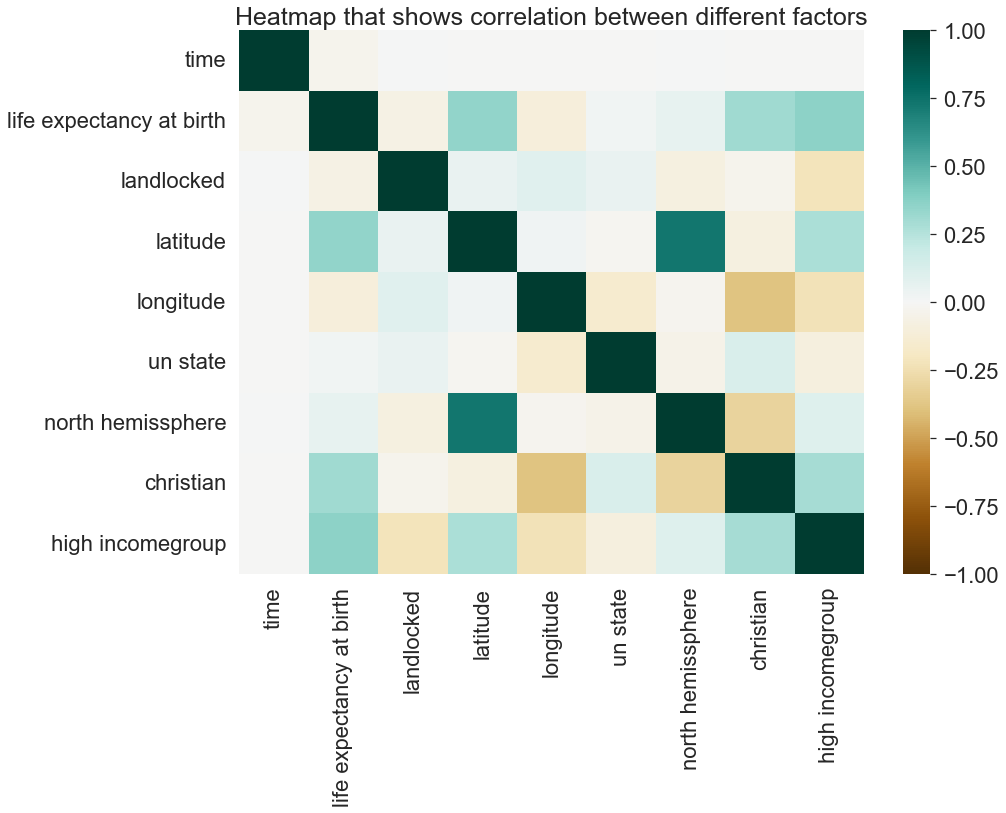

In [32]:
plt.figure(figsize = (14,10))
sns.set(font_scale = 2)
s = sns.heatmap(df_old.corr(), vmin=-1, vmax=1, cmap='BrBG')
plt.title("Heatmap that shows correlation between different factors",fontsize = 25)

In [33]:

for column in binary_factors:
    mask = df_old[column] == 1
    df_1 = df_old[mask]["life expectancy at birth"]
    df_0 = df_old[~mask]["life expectancy at birth"]
    print(column,len(df_1), len(df_0))


landlocked 798 3066
north hemissphere 3087 777
christian 2268 1596
high incomegroup 2247 1617
un state 3822 42


We see that we have always more than 30 samples per group and factor so we can use a z-test for the assumed normality which isn't true for this case

In [34]:
for column in binary_factors:
    mask = df_adjusted[column] == 1
    df_1 = df_adjusted[mask]["life expectancy at birth"]
    df_0 = df_adjusted[~mask]["life expectancy at birth"]
    stats, pvalue = ztest(df_1, df_0, alternative='two-sided')
    if pvalue <0.05:
        print("The P-value of the Factor {} is smaller than 0.05 and therefore we can reject H0\np_value: {:.2e}".format(column,pvalue))


The P-value of the Factor landlocked is smaller than 0.05 and therefore we can reject H0
p_value: 1.47e-62
The P-value of the Factor north hemissphere is smaller than 0.05 and therefore we can reject H0
p_value: 2.42e-79
The P-value of the Factor christian is smaller than 0.05 and therefore we can reject H0
p_value: 8.86e-27
The P-value of the Factor high incomegroup is smaller than 0.05 and therefore we can reject H0
p_value: 0.00e+00
The P-value of the Factor un state is smaller than 0.05 and therefore we can reject H0
p_value: 3.94e-16


Text(0, 0.5, 'Life expectancy in years')

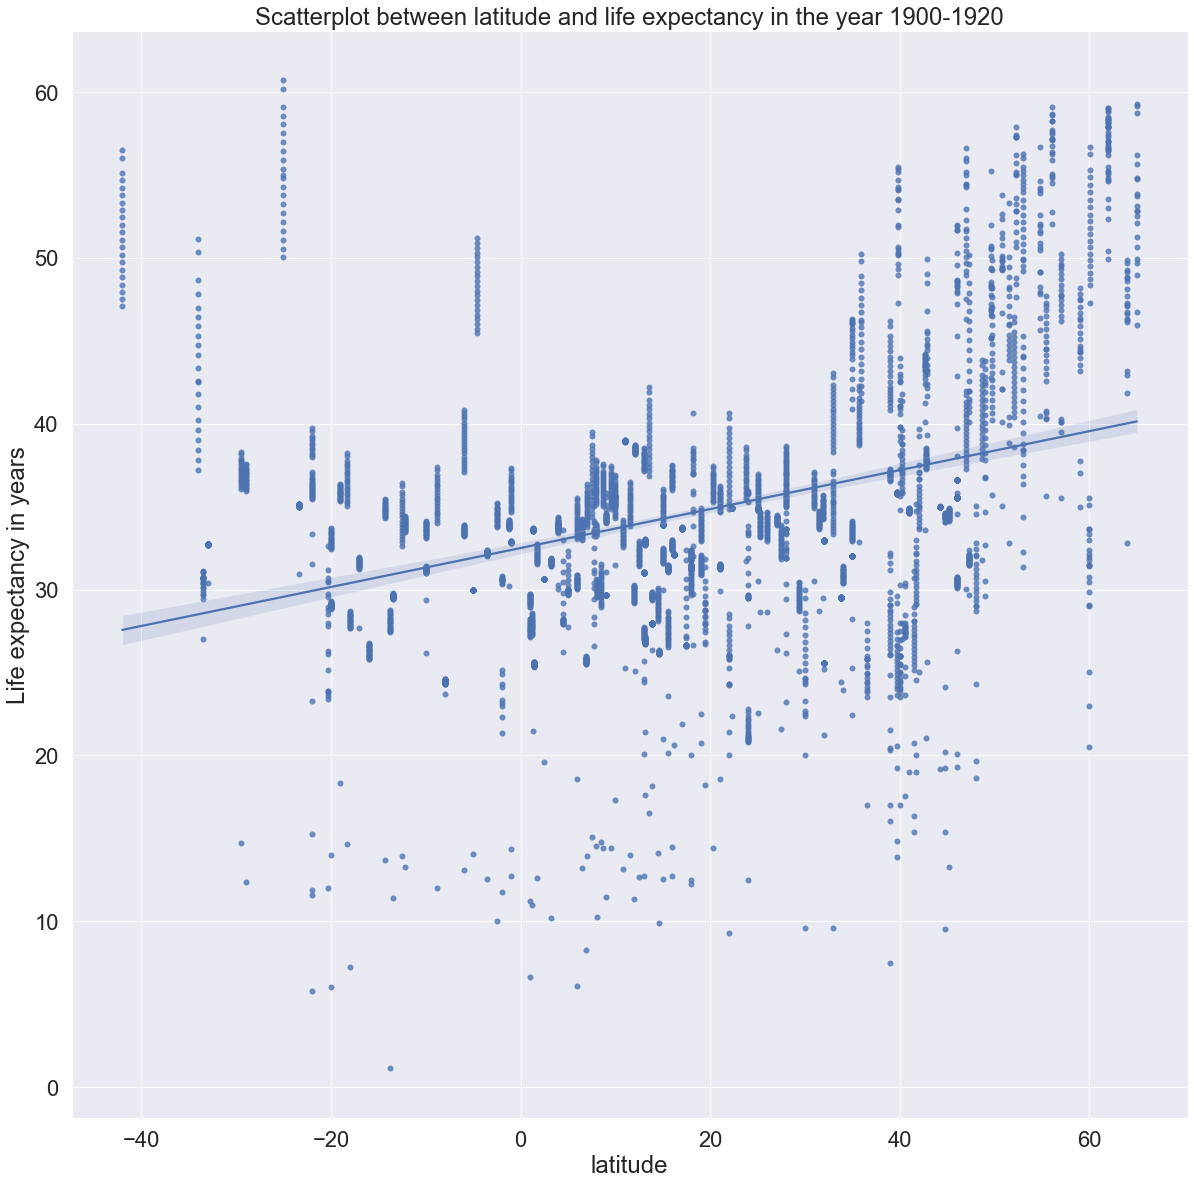

In [35]:
plt.figure(figsize=(20,20))
sns.regplot(x=df_old["latitude"],y = df_old["life expectancy at birth"])
plt.title("Scatterplot between latitude and life expectancy in the year 1900-1920")
plt.ylabel("Life expectancy in years")

We see that life expectancy was way lower and more diverse over the years, Maybe due to the war and lack of medical infrastructure etc.

In [36]:
#MLR model
df_old["lat"] = standardize(df_old["latitude"].dropna())
df_old["life_st"] = standardize(df_old["life expectancy at birth"].dropna())
df_old["hemi"] = df_old["north hemissphere"]
df_old["inc"] = df_old["high incomegroup"]
df_old["un"] = df_old["un state"]
mod = smf.ols(formula='life_st ~ lat + C(landlocked) +C(hemi)+C(christian)+C(inc)+C(un)', data=df_old)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                life_st   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     275.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          6.72e-294
Time:                        19:34:47   Log-Likelihood:                -4794.4
No. Observations:                3864   AIC:                             9603.
Df Residuals:                    3857   BIC:                             9647.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0568      0.144      0.395      0.693      -0.225       0.338
C(landlocked)[T.1]    -0.1685      0.035     -4.784      0.000      -0.238      -0.099
C(hemi)[T.1]          -0.7058      0.054    -12.994      0.000      -0.812      -0.599
C(christian)[T.1]      0.4287      0.031     13.691      0.000       0.367       0.490
C(inc)[T.1]            0.3442      0.031     10.939      0.000       0.282       0.406
C(un)[T.1]             0.0911      0.132      0.689      0.491      -0.168       0.351
lat                    0.5290      0.022     24.566      0.000       0.487       0.571
==============================================================================
Omnibus:                      182.352   Durbin-Watson:                   0.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.706
Skew:                          -0.174   Prob(JB):                    2.60e-120
Kurtosis:                       4.817   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we can read out what the categorical variables contribute to life expectancy


We see that the latidue now is playing a smaller role than before, also beeing an un-state isnt significant in our linear regression model here and beeing christian play a role again

In [37]:
#double check with the anova
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('life_st ~ lat + C(landlocked) +C(hemi)+C(christian)+C(inc)+C(un)', data=df_old).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(landlocked),16.056216,1.0,22.886845,1.782519e-06
C(hemi),118.457274,1.0,168.851314,8.113794e-38
C(christian),131.502648,1.0,187.446446,1.067008e-41
C(inc),83.953338,1.0,119.668730,1.884690e-27
C(un),0.333045,1.0,0.474729,4.908609e-01
lat,423.391353,1.0,603.510314,6.119961e-124
Residual,2705.869993,3857.0,NaN,NaN


Also for our anova we see, that Landlocked, Hemissphere, Christian, High income and Latitude play a role. but not beeing an un-state

Text(0.5, 0, 'Life Expectancy in years')

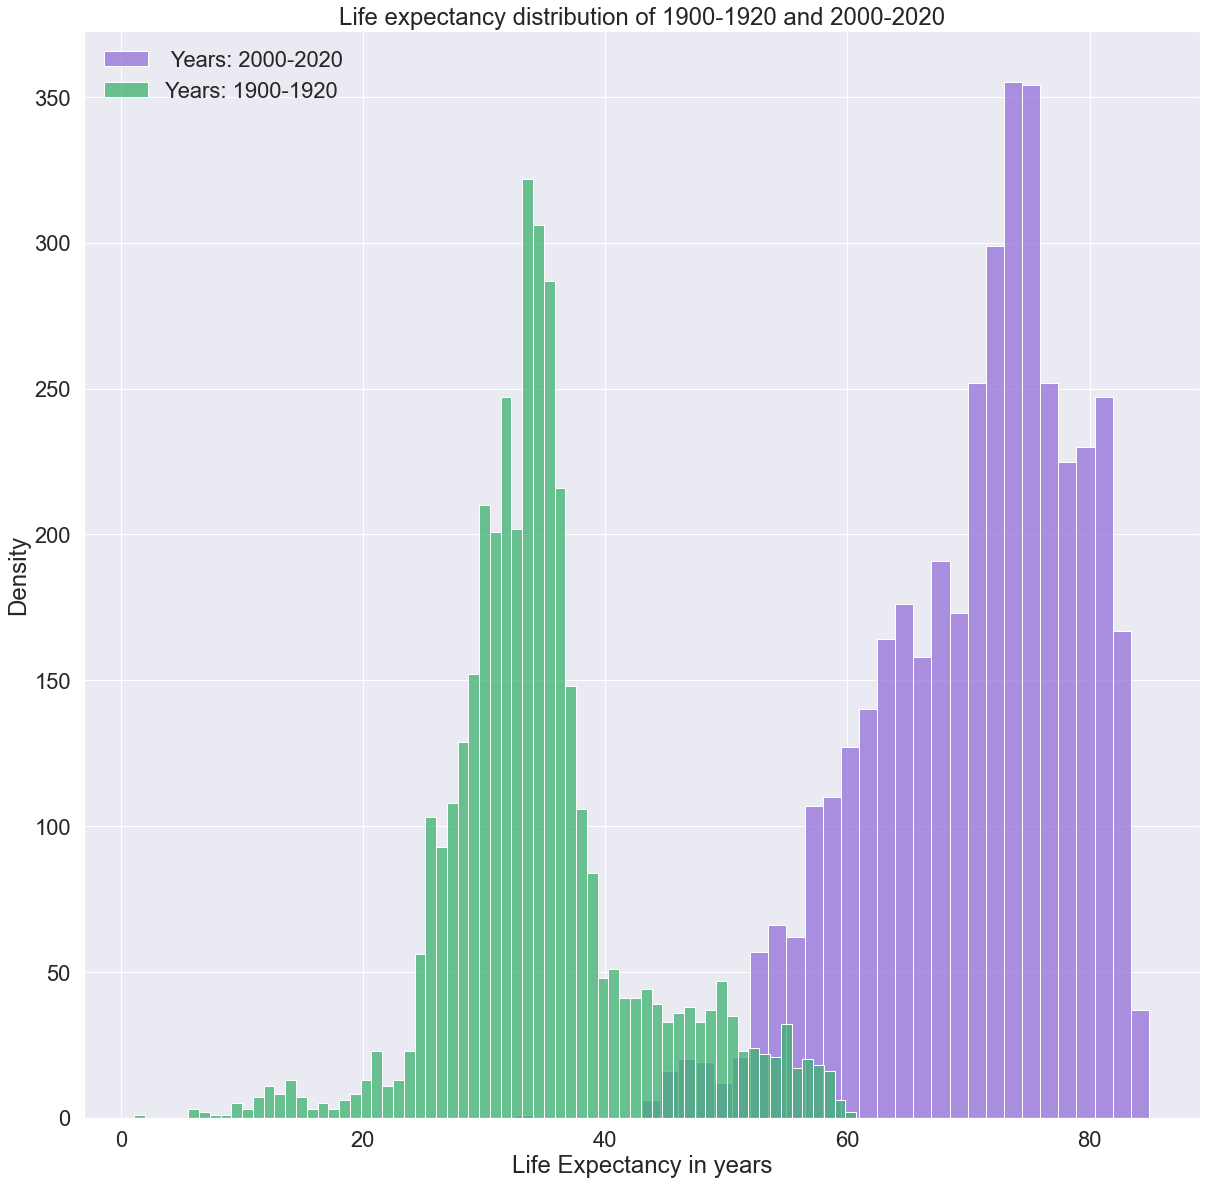

In [38]:
plt.figure(figsize = (20,20))
sns.histplot(df_adjusted["life expectancy at birth"], color='mediumpurple',label = " Years: 2000-2020")
sns.histplot(df_old["life expectancy at birth"], color='mediumseagreen',label = "Years: 1900-1920")
plt.legend()
plt.title("Life expectancy distribution of 1900-1920 and 2000-2020")
plt.ylabel("Density")
plt.xlabel("Life Expectancy in years")


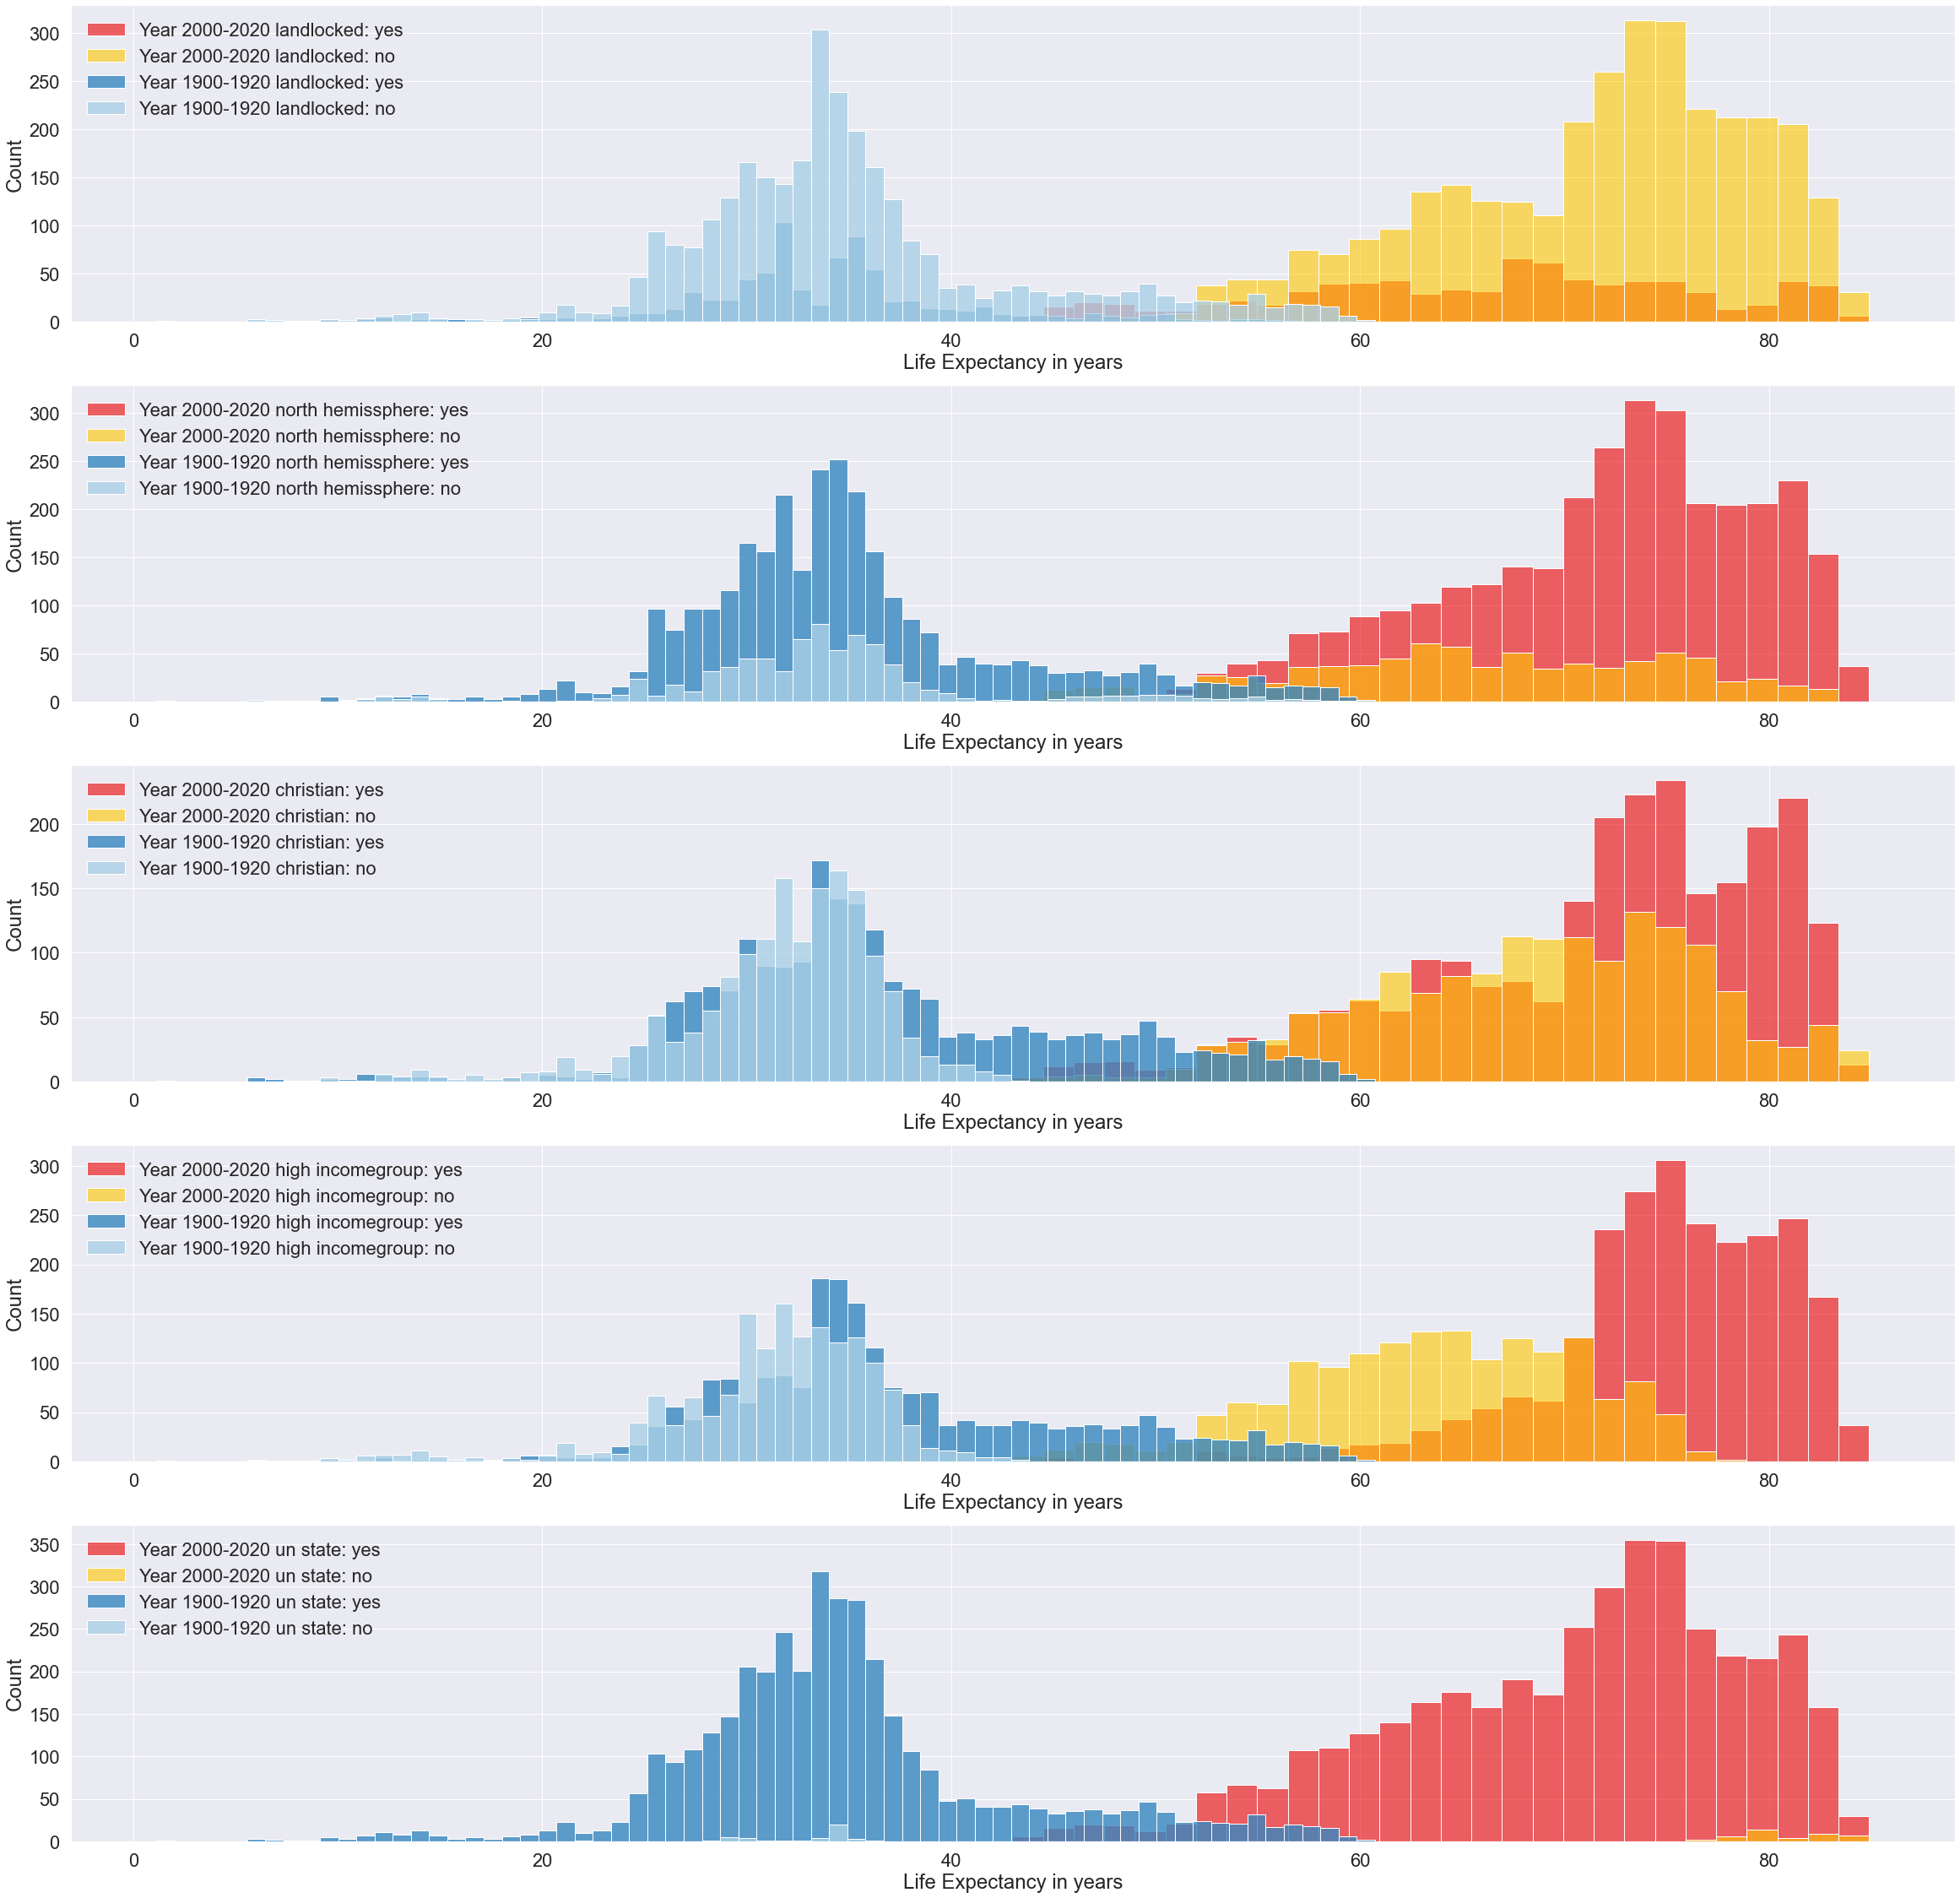

In [39]:
i = 1
plt.figure(figsize=(40,40))
for feature in binary_factors:
    plt.subplot(len(binary_factors),1, i)
    sns.histplot(x = "life expectancy at birth",data = df_adjusted, palette = "hot_r" ,hue = feature,alpha = 0.6)
    sns.histplot(x = "life expectancy at birth",data = df_old, palette ="Blues",label = " Years: 2000-2020",hue = feature,alpha = 0.8)
    plt.xlabel("Life Expectancy in years")
    i = i+1
    plt.legend(labels = ("Year 2000-2020 {}: yes".format(feature),"Year 2000-2020 {}: no".format(feature), "Year 1900-1920 {}: yes".format(feature),"Year 1900-1920 {}: no".format(feature)))
plt.show()
plt.close()

Again we see that beeing poor is a factor that decreases life expectancy in the modern world while this wasn't the case 1900-1920

Task 2: Ratio female-male population

In [40]:
#selecting right timeframe
df_group_adj = df_group[(df_group["Time"] >= 1950) & (df_group["Time"]<= 2010)]
df_group_adj["name"] = df_group_adj["Location"]


C:\Users\thoma\AppData\Local\Temp\ipykernel_15156\4160986567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_adj["name"] = df_group_adj["Location"]


In [41]:
#make df more pretty and merge it we left joint it because geo location is more important for us
df_task = df_geo.merge(df_group_adj, on = "name", how = "left")
df_task = df_task.drop(["LocID","VarID","Location"],axis = 1)

In [42]:
#calculate the worldwide ratio (men/female)
# check the values of missing entries
if df_task["PopMale"].isnull().sum() >0 or df_task["PopFemale"].isnull().sum() >0:
    print("We have missing values: PopMale {}, PopFemale{}".format(df_task["PopMale"].isnull().sum() , df_task["PopFemale"].isnull().sum()))
    
else:
    print("We don't have missing values")

df_task.dropna(subset=["PopMale","PopFemale"])
df_agegroup = df_task[df_task["AgeGrp"]=="25-29"]

We have missing values: PopMale 37, PopFemale37


In [43]:
world_ratio = np.sum(df_task[df_task["AgeGrp"]=="25-29"]["PopMale"].dropna()) / np.sum(df_task[df_task["AgeGrp"]=="25-29"]["PopFemale"].dropna())
print("The world_ratio of males / females in the Age Group 25 -29 is {:.3f}".format(world_ratio))

The world_ratio of males / females in the Age Group 25 -29 is 1.039


There are more men than female in the world let's see if that is the case for other countries aswell

In [44]:
#Check wheter or not we have all countries. 
print("The difference of lengths between df_geo and df_task in respect to the country names is {}".format(len(set(df_geo["name"])) - len(df_task["name"].unique())))

The difference of lengths between df_geo and df_task in respect to the country names is 0


I will use a chisquare test
with

H0:there isnt' a significant difference between the Males and Females in 1950 and Males and Females in 2010 in a country
H1:there is a significant difference between the the Males and Females in 1950 and Males and Females in 2010 in a country

Significance lvl has to be accounted for multiple testing. therefore we take 5% / len(df_task["name"].unique() as our significance level. will be implemented later

First we test for normality with a graphical plot

In [45]:
#test for normality
ratios = list()
for country in df_task["name"].unique():
    ratios.append(df_task[(df_task["AgeGrp"].dropna()=="25-29") & (df_task["name"].dropna()==country)]["PopMale"].dropna() /
                  df_task[(df_task["AgeGrp"].dropna()=="25-29") & (df_task["name"].dropna()==country)]["PopFemale"].dropna())

Text(0.5, 1.0, 'Distribution of Ratios')

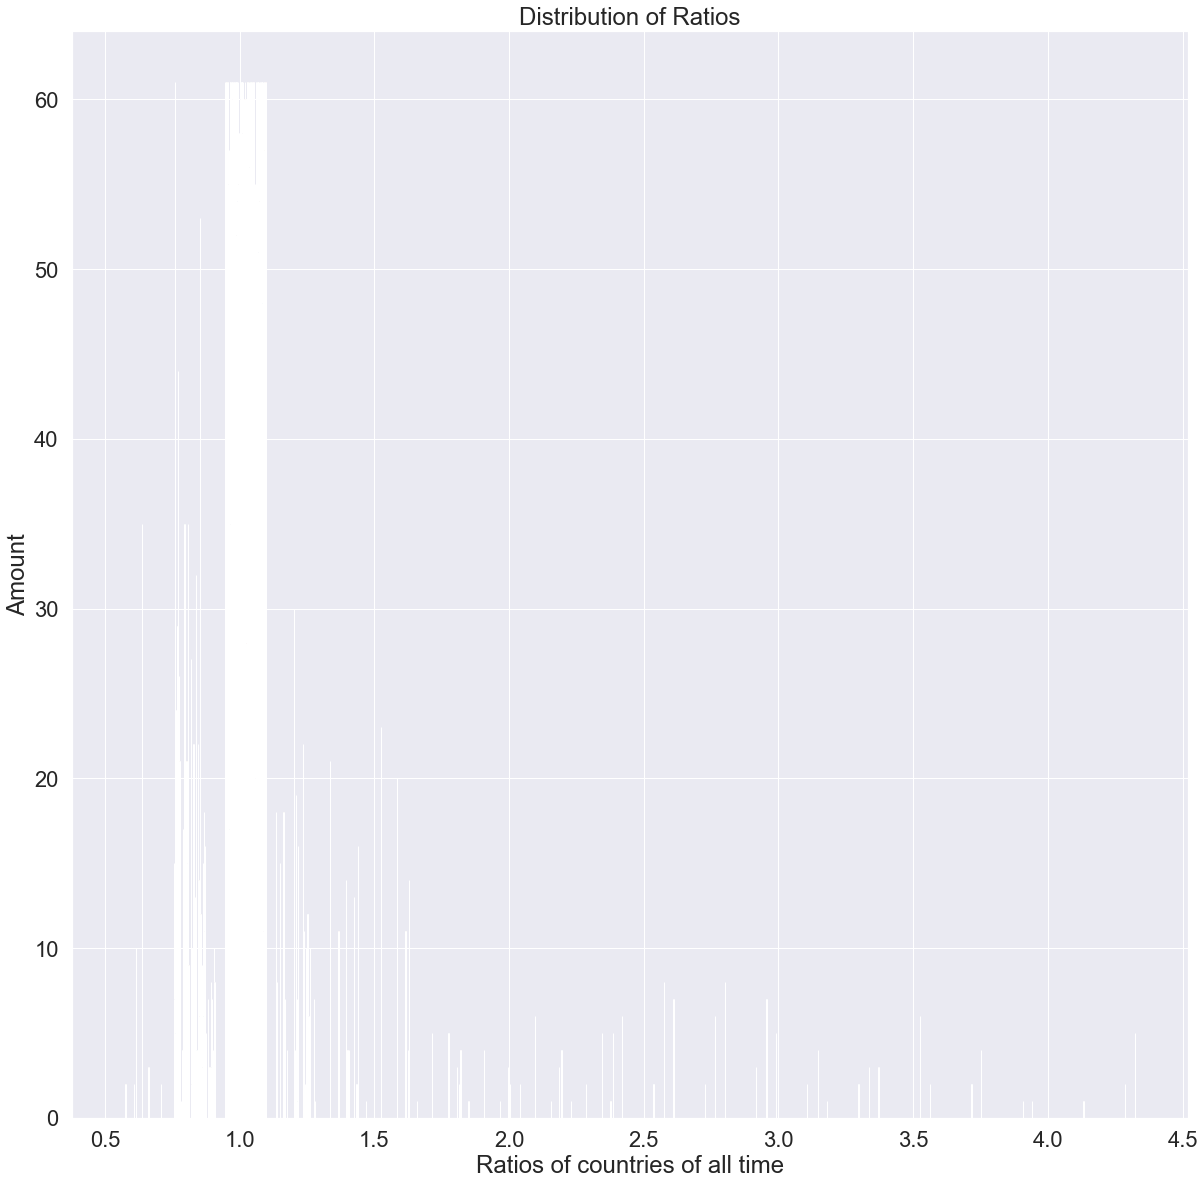

In [46]:
plt.figure(figsize=(20,20))
plt.hist(ratios,bins = 20)
plt.xlabel("Ratios of countries of all time")
plt.ylabel("Amount")
plt.title("Distribution of Ratios")

The ratio looks normally distributed but we can see that there must be some outliers! we therefore can perform a chi square test

In [47]:
#this is not really necessary
mask_old = (df_agegroup["Time"]==1950)
mask_new = (df_agegroup["Time"]==2010)
df_1950 =df_agegroup[mask_old]
df_2010 =df_agegroup[mask_new]

df_1950.reset_index()
df_2010.reset_index()
df_1950["ratio"] = df_1950["PopMale"] / df_1950["PopFemale"]
df_2010["ratio"] = df_2010["PopMale"] / df_2010["PopFemale"]

import scipy.stats as stats
#we can look wheter or not there is a significant difference between 1950 and 2010 ratio
print("P-value of a paired t-test to see wheter or not Popultion ratio significantly changed: {:.4f}".format(stats.ttest_rel(df_1950["ratio"], df_2010["ratio"]).pvalue))

P-value of a paired t-test to see wheter or not Popultion ratio significantly changed: 0.0071


C:\Users\thoma\AppData\Local\Temp\ipykernel_15156\1967815931.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1950["ratio"] = df_1950["PopMale"] / df_1950["PopFemale"]
C:\Users\thoma\AppData\Local\Temp\ipykernel_15156\1967815931.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010["ratio"] = df_2010["PopMale"] / df_2010["PopFemale"]


In [48]:

observed = df_2010["ratio"]
expectation = df_1950["ratio"]
x = sum([(o-e)**2./e for o,e in zip(observed,expectation)])


#import chi2 from scipy to get the critical value
from scipy.stats import chi2
alpha = 0.05
df = 2
cr=chi2.ppf(q=1-alpha,df=df)
if x > cr:
    print("We can reject the null hypothesis and there are differences in ratios")
    print("Test statistic: ",round(x,3), "Critical Value",round(cr,3))



We can reject the null hypothesis and there are differences in ratios
Test statistic:  21.691 Critical Value 5.991


In [49]:
country_list = list()
#do a chi square test for each country
for country in df_1950["name"].unique():
    mask = df_1950["name"] == country 
    mask_new = df_2010["name"] == country
    male = float(df_1950[mask]["PopMale"])
    female = float(df_1950[mask]["PopFemale"])
    male_new = float(df_2010[mask_new]["PopMale"])
    female_new = float(df_2010[mask_new]["PopFemale"])
    d = {'male': [male, male_new], 'female': [female, female_new]}
    data = pd.DataFrame(data=d)
    a =stats.chi2_contingency(data)
    #we adjust for multiple testing and decrease our siginificance level by dividing by the number of all countries.
    if a[1] < (0.05/len(df_1950["name"].unique())):
        country_list.append(country)
        print("The country {} with p-value has H0 rejected and differs significantly with p-value {:.2e}".format(country,a[1]))
country_list
#we will add Switzerland to this list for the plot
country_list.append("Switzerland")

The country Germany with p-value has H0 rejected and differs significantly with p-value 8.52e-19
The country Japan with p-value has H0 rejected and differs significantly with p-value 7.96e-11
The country Pakistan with p-value has H0 rejected and differs significantly with p-value 1.65e-05
The country Ukraine with p-value has H0 rejected and differs significantly with p-value 8.18e-19


We found our 4 Countries which have a significant difference between the ratio of males and females when compared to 2010 with respect to 1950!

C:\Users\thoma\AppData\Local\Temp\ipykernel_15156\1305618753.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df50["male"] = df50["PopMale"]
C:\Users\thoma\AppData\Local\Temp\ipykernel_15156\1305618753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df50["female"] = df50["PopFemale"] * -1
C:\Users\thoma\AppData\Local\Temp\ipykernel_15156\1305618753.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


<Figure size 720x720 with 0 Axes>

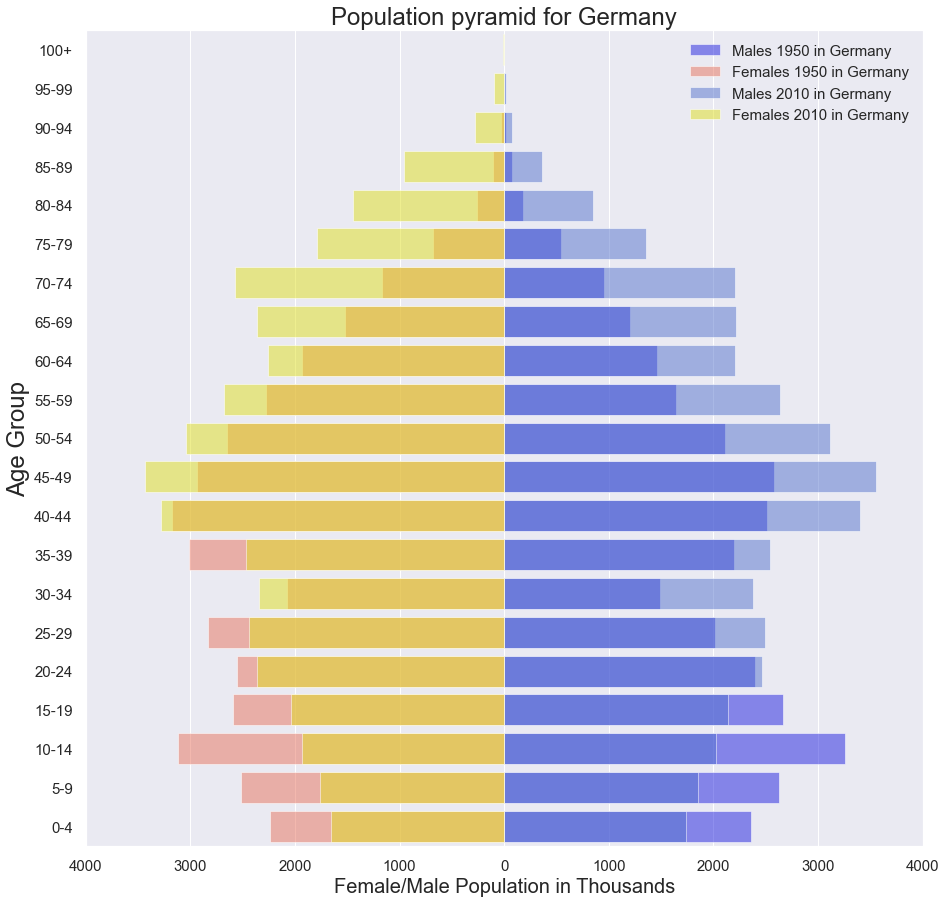

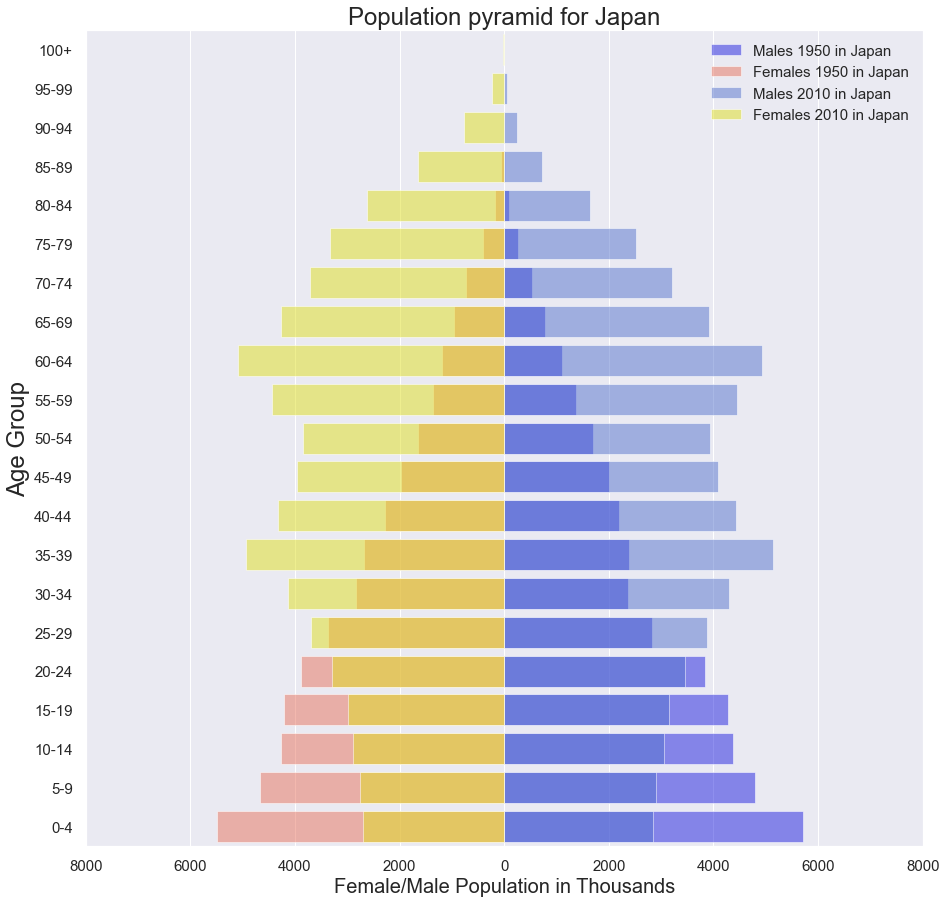

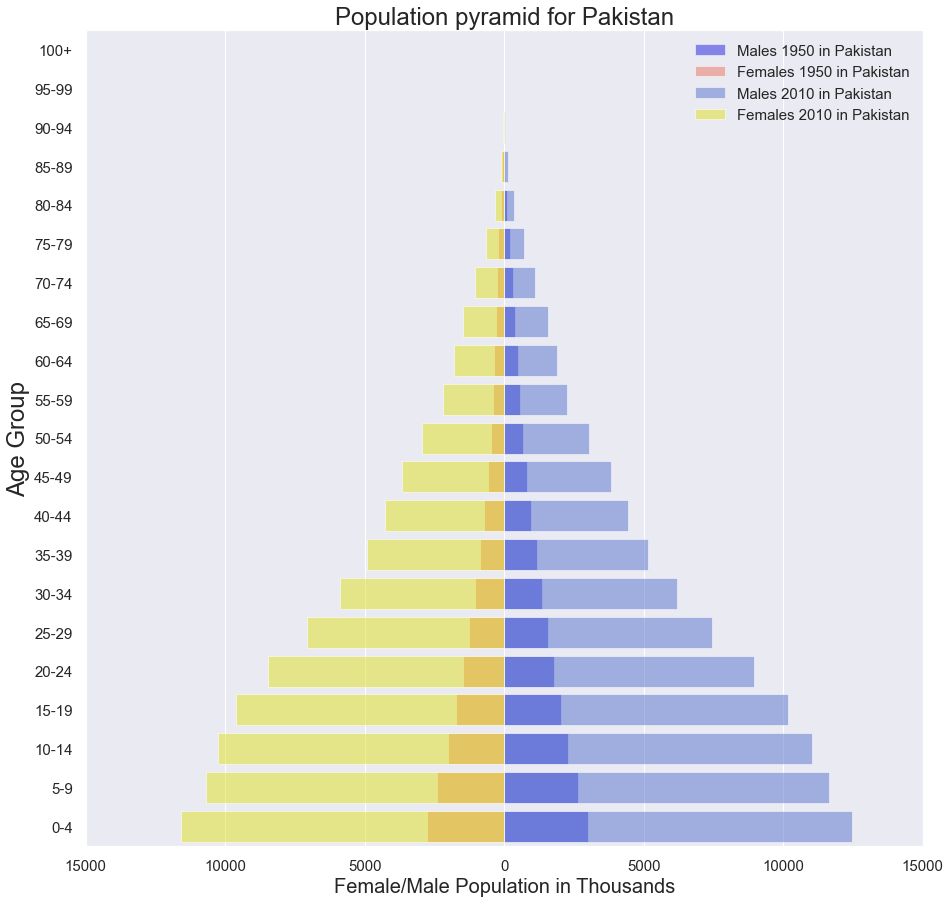

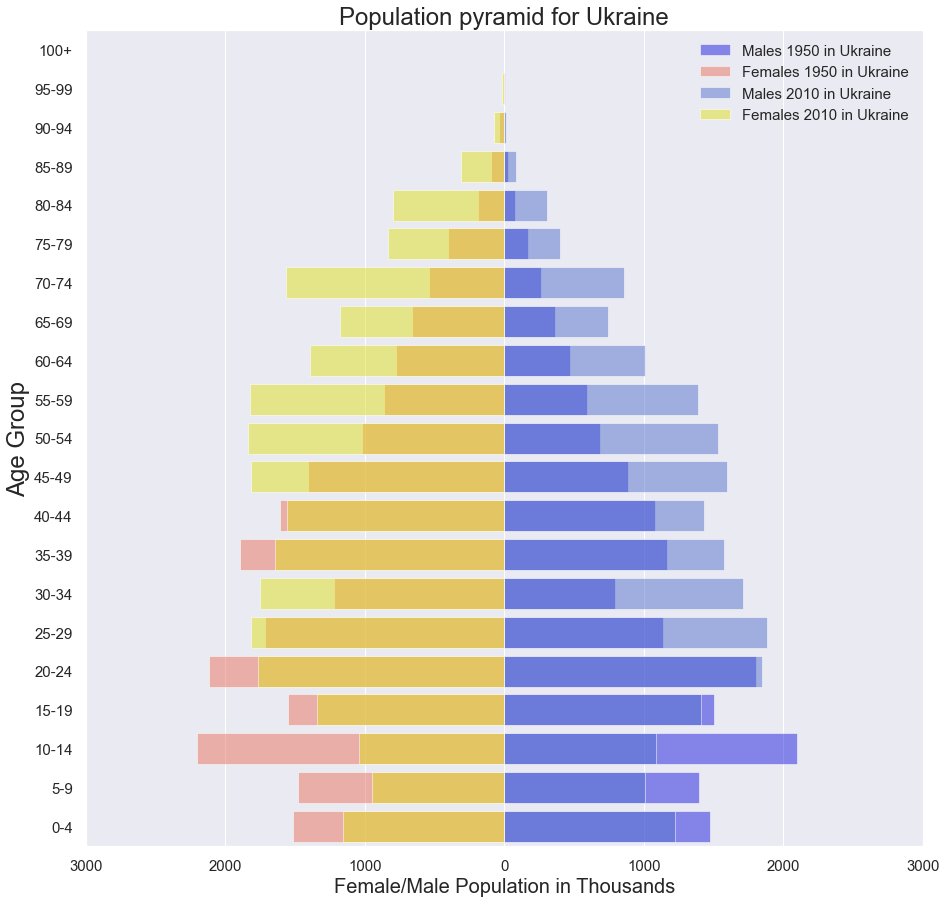

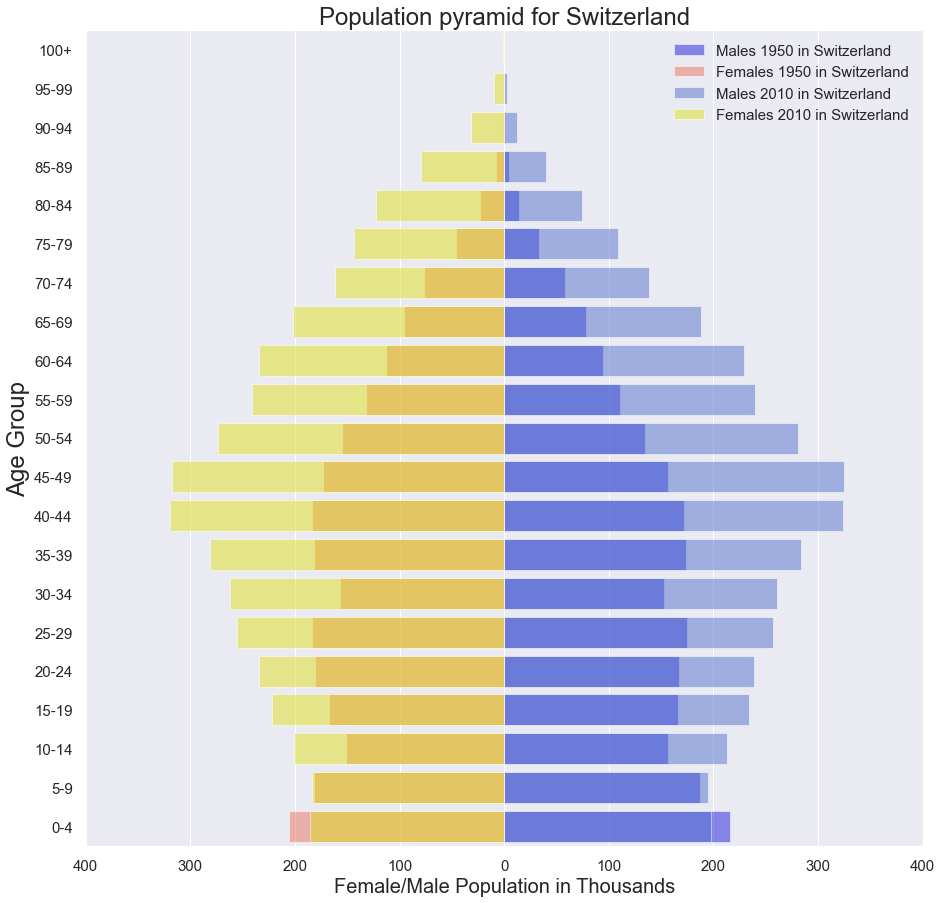

In [50]:
plt.figure(figsize=(10,10))
for country in country_list:
    #plot for each country
    plt.subplots(figsize = (15,15))
    df50 = df_task[(df_task["Time"]==1950) & (df_task["name"] == country)]
    df10 = df_task[(df_task["Time"]==2010)  & (df_task["name"] == country)]
    df50["male"] = df50["PopMale"]
    df50["female"] = df50["PopFemale"] * -1
    df10["male"] = df10["PopMale"]
    df10["female"] = df10["PopFemale"] * -1

    ax1 = sns.barplot(x='male', y='AgeGrp', data=df50, order=np.flip(df50["AgeGrp"].unique()),  color="blue", alpha = 0.5, label = "Males 1950 in {}".format(country))
    ax2 = sns.barplot(x='female', y='AgeGrp', data=df50 , order=np.flip(df50["AgeGrp"].unique()), color="tomato",alpha = 0.5,label = "Females 1950 in {}".format(country))
    ax3 = sns.barplot(x='male', y='AgeGrp', data=df10 , order=np.flip(df50["AgeGrp"].unique()),  color="royalblue",alpha = 0.5,label = "Males 2010 in {}".format(country))
    ax4 = sns.barplot(x='female', y='AgeGrp', data=df10 , order=np.flip(df50["AgeGrp"].unique()),  color="yellow",alpha = 0.5,label = "Females 2010 in {}".format(country))
    plt.title("Population pyramid for {}".format(country))
    plt.xlabel("Female/Male Population in Thousands",fontsize = 20)
    plt.legend(fontsize = 15)
    plt.ylabel("Age Group")
    plt.yticks(fontsize=15)
    plt.xticks()
    #setting the ticks right so that we don't have negative values
    y=(ax4.get_xticks())
    lab = (abs(y))
    tick = list()
    for element in lab:
        tick.append(str(int(element)))
   
    plt.xticks(ticks=y,labels=tick,fontsize = 15)